# Random Forest

# Data preparation

In [53]:
import pandas as pd
import numpy as np
import random
import os

In [54]:
age = []
fbs = []
bp = []
chol = []
chest_pain = [] 
height = []
weight =[]

In [55]:
for i in range(20000):
    chpain_t = np.random.randint(0,2)
    chol_t = np.random.randint(150,351)
    fbs_t = np.random.randint(50,201)
    height_t = np.random.randint(140,191)
    weight_t = np.random.randint(35,111)
    bp_t = np.random.randint(75,261)
    if i%5==0 or i%3==0:
        age_t = np.random.choice([np.random.randint(20,46),np.random.randint(71,86)])
    else:
        age_t = np.random.randint(45,71)
    age.append(age_t)
    height.append(height_t)
    weight.append(weight_t)
    chest_pain.append(chpain_t)
    bp.append(bp_t)
    fbs.append(fbs_t)
    chol.append(chol_t)

In [56]:
heart_dict = {'age':age, 'height':height, 'weight':weight, 'chest_pain':chest_pain, 'bp':bp, 'fbs':fbs, 'chol':chol}
df_heart = pd.DataFrame(heart_dict)
df_heart.to_csv('heart_data.csv',index=False)
df_heart


,age,height,weight,chest_pain,bp,fbs,chol
0,77,156,75,0,244,82,208
1,54,154,63,1,137,123,247
2,50,186,64,1,242,119,170
3,81,159,45,0,96,88,158
4,47,165,49,1,157,66,172
5,81,145,90,0,147,74,172
6,78,177,68,1,106,133,311
7,69,178,60,1,143,150,304
8,52,150,93,1,199,120,216
9,72,177,87,1,148,169,256


# Data Filteration

In [57]:
df = pd.read_csv('heart_data.csv')
df1 = pd.read_csv('heart_data.csv')
risk = []
rule = []

In [58]:
for i in range(len(df)):
    bmi = round(((df.iloc[i,2])/((df.iloc[i,1]/100)**2)),2)
    temp = df.iloc[i,:].tolist()
    if((temp[5]>120 and temp[4]>145 and temp[0]>52) or (bmi>=24.5 and temp[6]>210) or (temp[3]==1 and temp[6]>200 and temp[0]>56)):
        risk.append(1)
#         rule.append(1)
    elif((temp[4]>150 and temp[6]>210) or (temp[3]==1 and temp[4]<150 and temp[6]>200) or (temp[5]>=120 and temp[0]>60 and temp[6]<200)):
        risk.append(1)
#         rule.append(2)
    elif((temp[3]==0 and (bmi in range(18,25)) and temp[6]<190 and temp[0]<30) or (temp[5]<120 and temp[6]<190 and temp[0]<40)):
        risk.append(0)
#         rule.append(3)
    else:
        risk.append(0)
#         rule.append(0)
         

In [59]:
df1.insert(7,'risk',risk)
df1

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,77,156,75,0,244,82,208,0
1,54,154,63,1,137,123,247,1
2,50,186,64,1,242,119,170,0
3,81,159,45,0,96,88,158,0
4,47,165,49,1,157,66,172,0
5,81,145,90,0,147,74,172,0
6,78,177,68,1,106,133,311,1
7,69,178,60,1,143,150,304,1
8,52,150,93,1,199,120,216,1
9,72,177,87,1,148,169,256,1


In [60]:
df_yes = df1[df1.risk == 1]
df_no = df1[df1.risk == 0]
df_new = df1.iloc[-1:-1,:]
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk


In [61]:
df_new = df_new.append(df_no,ignore_index=True)
df_new = df_new.iloc[:3824,:]
df_new = df_new.append(df_yes,ignore_index=True)
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,77,156,75,0,244,82,208,0
1,50,186,64,1,242,119,170,0
2,81,159,45,0,96,88,158,0
3,47,165,49,1,157,66,172,0
4,81,145,90,0,147,74,172,0
5,71,145,39,0,110,140,283,0
6,21,178,73,1,151,59,188,0
7,50,145,85,1,187,110,187,0
8,72,160,75,1,198,114,158,0
9,60,160,88,0,192,102,159,0


In [62]:
df_new.risk.value_counts()
df_new.to_csv('heart_pred_data.csv',index=False)

# Data Represntation

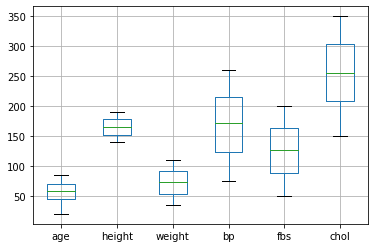

In [67]:
df = pd.read_csv('heart_pred_data.csv')
boxplot = df.boxplot(column=['age', 'height', 'weight','bp','fbs','chol'])

# Modeling

In [33]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

In [34]:
df = pd.read_csv('heart_pred_data.csv')
print("----------------------------------Data------------------------------------")
print(df)

----------------------------------Data------------------------------------
      age  height  weight  chest_pain   bp  fbs  chol  risk
0      67     141      35           1  185   84   333     1
1      73     164      46           1  231  123   208     1
2      59     158      86           1   93   61   194     0
3      59     154      54           1   98  187   265     1
4      36     186     103           0  186  131   325     1
5      37     154      84           0  202  127   156     0
6      48     157      89           0  228  187   202     0
7      35     179      88           1  221  161   242     1
8      66     185      48           0   90   92   238     0
9      55     170      70           0  213  117   200     0
10     82     179     105           1  135  109   176     0
11     70     149      44           0  127   53   292     0
12     75     171      85           1  201  129   241     1
13     62     179      55           0   75  135   218     0
14     60     171      48

In [35]:
#splittng data for prediction
df1 = df.iloc[9000:,:]
df = df.iloc[:9000,:]
test_XX = df1.iloc[:,:-1].values
actual_yy = df1.iloc[:,-1].values
actual_y = actual_yy.tolist()
df

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,67,141,35,1,185,84,333,1
1,73,164,46,1,231,123,208,1
2,59,158,86,1,93,61,194,0
3,59,154,54,1,98,187,265,1
4,36,186,103,0,186,131,325,1
5,37,154,84,0,202,127,156,0
6,48,157,89,0,228,187,202,0
7,35,179,88,1,221,161,242,1
8,66,185,48,0,90,92,238,0
9,55,170,70,0,213,117,200,0


In [36]:
df.risk.value_counts()

1    5555
0    3445
Name: risk, dtype: int64

In [37]:
print("----------------------------------------Data Description----------------------------------------")
df.describe()

----------------------------------------Data Description----------------------------------------


,age,height,weight,chest_pain,bp,fbs,chol,risk
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,56.035000,165.105333,72.091778,0.470333,165.106000,123.103778,242.058333,0.617222
std,16.982469,14.667255,22.202545,0.499147,54.042937,43.440135,59.374787,0.486092
min,20.000000,140.000000,35.000000,0.000000,75.000000,50.000000,150.000000,0.000000
25%,45.000000,152.000000,53.000000,0.000000,118.000000,85.000000,189.000000,0.000000
50%,57.000000,165.000000,72.000000,0.000000,164.000000,121.000000,238.000000,1.000000
75%,69.000000,178.000000,92.000000,1.000000,213.000000,161.000000,293.000000,1.000000
max,85.000000,190.000000,110.000000,1.000000,260.000000,200.000000,350.000000,1.000000


In [38]:
X = df.iloc[:,:7]
Y = df.iloc[:,-1]
db_no =df[df.risk == 0]
db_yes = df[df.risk == 1]
X_features = list( df.columns )[:-1]
print("Features: ",X_features)

Features:  ['age', 'height', 'weight', 'chest_pain', 'bp', 'fbs', 'chol']


In [39]:
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size = 0.2,random_state = 65)

In [40]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit( train_X, train_y)
pred_y0 = rf.predict(test_X)

In [41]:
r20=r2_score(test_y, pred_y0) 
mse0=mean_squared_error(test_y, pred_y0)
print("R Squared Error : ",r20)
print("Mean Squared Error : ",mse0)

R Squared Error :  0.9810593854033628
Mean Squared Error :  0.0044444444444444444


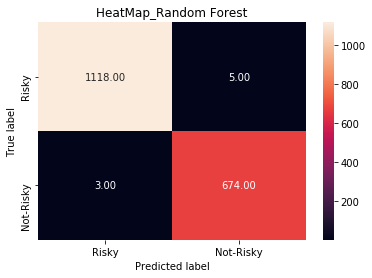

In [48]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_Random Forest')
    plt.show()
draw_cm(test_y,pred_y0 )

In [43]:
print( metrics.classification_report( test_y, pred_y0 ) )

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       677
           1       1.00      1.00      1.00      1123

    accuracy                           1.00      1800
   macro avg       0.99      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



In [44]:
acc4 = metrics.accuracy_score(test_y, pred_y0)
print("Accuracy:",acc4)

prec4 = metrics.precision_score(test_y, pred_y0)
print("Precision:",prec4)

recall4 = metrics.recall_score(test_y, pred_y0)
print("Recall:",recall4)

f1sc4 = metrics.f1_score(test_y, pred_y0)
print("F1-Score:",f1sc4)

kappa4 = metrics.cohen_kappa_score(test_y, pred_y0)
print("Kappa-Stat:",kappa4)

Accuracy: 0.9955555555555555
Precision: 0.9973238180196253
Recall: 0.9955476402493322
F1-Score: 0.9964349376114081
Kappa-Stat: 0.9905352450385623


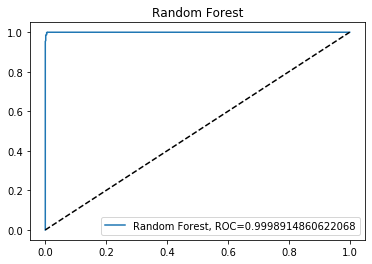

In [50]:
y_pred_proba0 = rf.predict_proba(test_X)[:,1]
fpr0, tpr0, _ = metrics.roc_curve( test_y,  y_pred_proba0)
auc0 = metrics.roc_auc_score( test_y, y_pred_proba0)
plt.plot(fpr0,tpr0,label="Random Forest, ROC="+str(auc0))
plt.legend(loc=4)
plt.title('Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

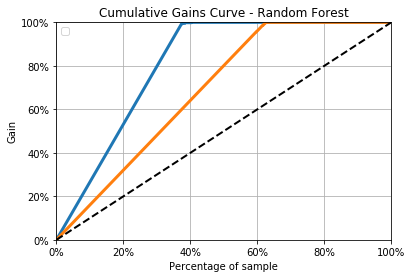

In [51]:
predicted_probas0 = rf.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas0)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"])
plt.legend('')
plt.title("Cumulative Gains Curve - Random Forest")
plt.show()

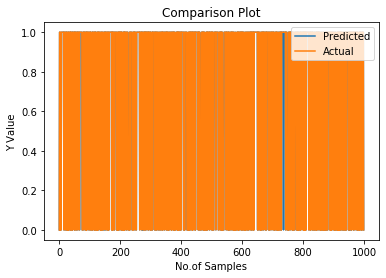

In [52]:
pred = rf.predict(test_XX)

def comaprison_plot(pred,actual):
    plt.plot(np.arange(1000),pred,label='Predicted')
    plt.plot(np.arange(1000),actual,label='Actual')
    plt.xlabel('No.of Samples')
    plt.ylabel('Y Value')
    plt.legend(loc='upper right')
    plt.title('Comparison Plot')
    plt.show()

comaprison_plot(pred,actual_yy)